In [19]:
# Project Setup 
print("Hello! Here We Perform Analysis On WebSite")
# Importing Used Python Libries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

Hello! Here We Perform Analysis On WebSite


In [2]:
# Importing dataset csv file
df = pd.read_csv("Web_data.csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [4]:
# Since there are some unnamed values here we need to drop them for our uses
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.head()

,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [6]:
# Since Now Header of the column are unkown 
df.columns = [
    'channel_group',
    'date_hour',
    'users',
    'sessions',
    'engaged_sessions',
    'avg_engagement_time_per_session',
    'engaged_sessions_per_user',
    'events_per_session',
    'engagement_rate',
    'event_count'
]
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [7]:
# Data Informatio 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   channel_group                    3181 non-null   object
 1   date_hour                        3181 non-null   object
 2   users                            3181 non-null   object
 3   sessions                         3181 non-null   object
 4   engaged_sessions                 3181 non-null   object
 5   avg_engagement_time_per_session  3181 non-null   object
 6   engaged_sessions_per_user        3181 non-null   object
 7   events_per_session               3181 non-null   object
 8   engagement_rate                  3181 non-null   object
 9   event_count                      3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


# Cleaning and Validation for data set

In [8]:
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count
0,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
1,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
2,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
3,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
4,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967


In [9]:
# Since all are in object fisrt convert actual data type
df["date_hour"] = pd.to_datetime(df["date_hour"], format="%Y%m%d%H", errors="coerce")

In [10]:
numeric_cols = df.columns.drop(["channel_group", "date_hour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df["Hours"] = df["date_hour"].dt.hour

In [11]:
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,Hours
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   channel_group                    3181 non-null   object        
 1   date_hour                        3181 non-null   datetime64[ns]
 2   users                            3181 non-null   int64         
 3   sessions                         3181 non-null   int64         
 4   engaged_sessions                 3181 non-null   int64         
 5   avg_engagement_time_per_session  3181 non-null   float64       
 6   engaged_sessions_per_user        3181 non-null   float64       
 7   events_per_session               3181 non-null   float64       
 8   engagement_rate                  3181 non-null   float64       
 9   event_count                      3181 non-null   int64         
 10  Hours                            3181 non-null   int32      

In [13]:
df.describe()

,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,Hours
count,3181,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000,3181.000000
mean,2024-04-20 01:18:31.348632576,41.874568,51.114429,28.289217,66.650591,0.606449,4.675970,0.503404,241.907891,11.803521
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.097378,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.040404,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.500000,0.750000,5.218182,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,208.000000,267.000000,132.000000,4525.000000,2.000000,56.000000,1.000000,1147.000000,23.000000
std,NaN,29.383942,36.661139,20.551668,127.220206,0.264064,2.795667,0.228241,183.318978,6.884907


# Sessions and user over time

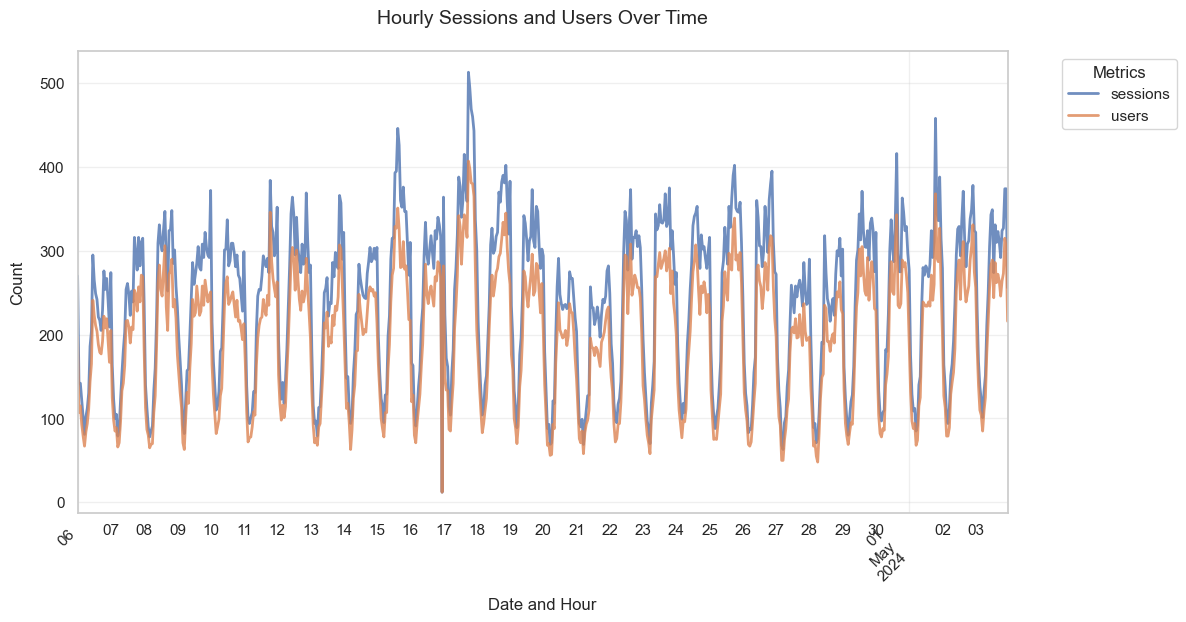

In [33]:
# Ploting Graph
sns.set(style="whitegrid", rc={"axes.labelsize": 12})

plt.figure(figsize=(12,6))
ax = df.groupby("date_hour")[["sessions","users"]].sum().plot(
    ax=plt.gca(),
    linewidth=2,
    alpha=0.8)
plt.title("Hourly Sessions and Users Over Time", pad=20, fontsize=14)
plt.xlabel("Date and Hour", labelpad=10)
plt.ylabel("Count", labelpad=10)

plt.xticks(rotation=45, ha='right')  # Rotate x-labels
ax.grid(True, alpha=0.3)
ax.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

# Total User by Channel

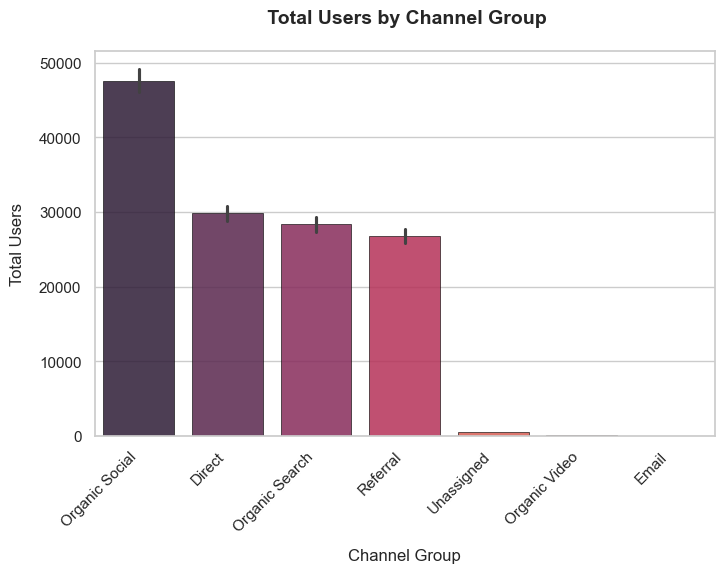

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,
            x = "channel_group",
            y = "users",
            estimator=np.sum,
            palette="rocket",
            hue="channel_group",legend=False,
            linewidth=0.5,
            edgecolor='black',
            alpha=0.85)
plt.title(" Total Users by Channel Group", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Channel Group", labelpad=10)
plt.ylabel("Total Users", labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,Hours
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


# Average Engagement time by channel

C:\Users\prita\AppData\Local\Temp\ipykernel_3472\1708683463.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


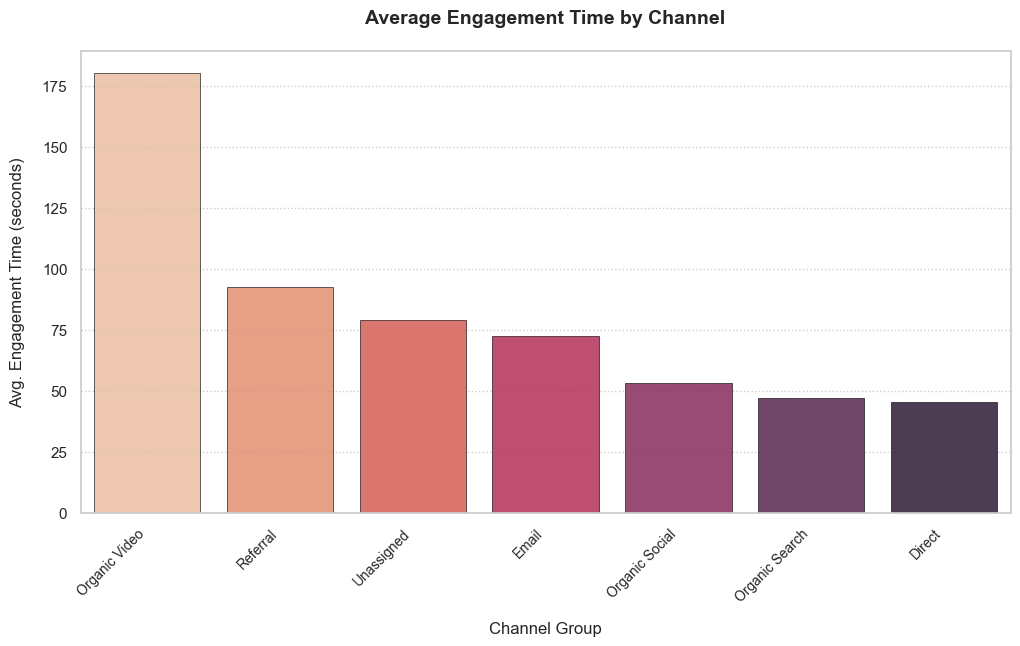

In [49]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid", {'grid.linestyle': ':'})
# Calculating Avarage enganemnet time by channel
avg_engagement = df.groupby('channel_group')['avg_engagement_time_per_session'].mean().sort_values(ascending=False)

sns.barplot(
            x = avg_engagement.index,
            y = avg_engagement.values,
            palette = "rocket_r",
            edgecolor='black',
            linewidth=0.5,
            alpha=0.85
)
plt.title("Average Engagement Time by Channel", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Channel Group", labelpad=12)
plt.ylabel("Avg. Engagement Time (seconds)", labelpad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


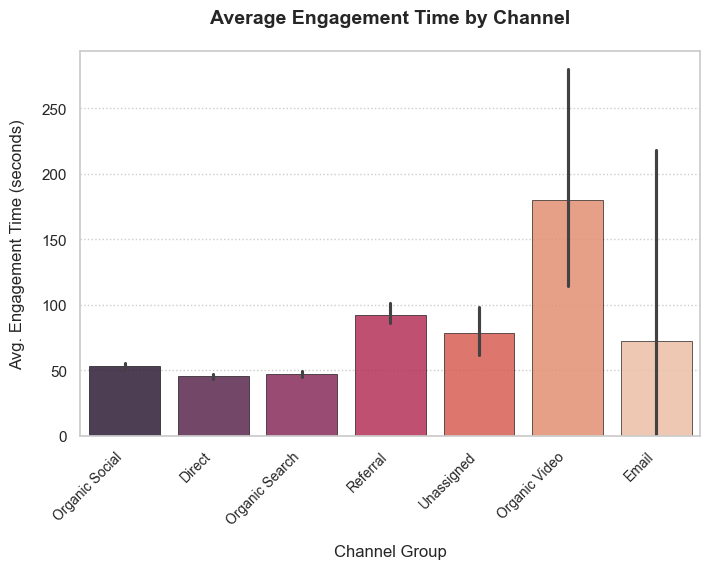

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x = "channel_group",
            y = "avg_engagement_time_per_session",
            palette="rocket",
            hue="channel_group",legend=False,
            linewidth=0.5,
            edgecolor='black',
            alpha=0.85)
plt.title("Average Engagement Time by Channel", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Channel Group", labelpad=12)
plt.ylabel("Avg. Engagement Time (seconds)", labelpad=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

In [52]:
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,Hours
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


# Engagement Rate Distribution by channel

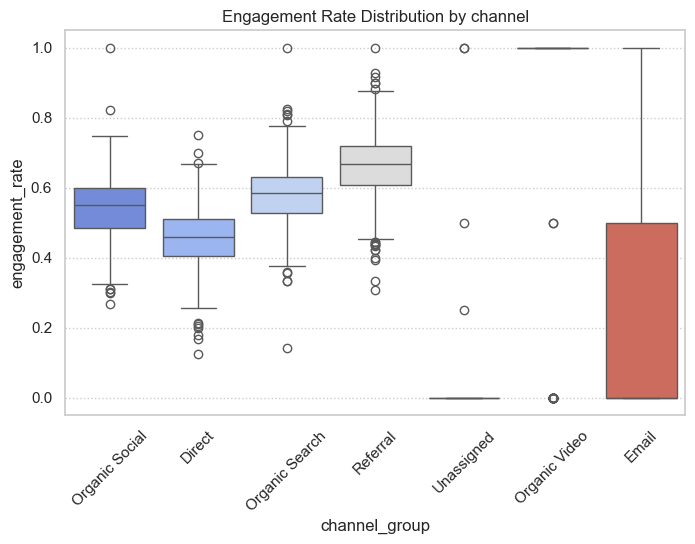

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data = df,
    x = "channel_group",
    y = "engagement_rate",
    palette = "coolwarm",
    hue = "channel_group"
)
plt.title("Engagement Rate Distribution by channel")
plt.xticks(rotation=45)
plt.show()

# Engaged vs non engaged Sessions

['channel_group', 'date_hour', 'users', 'sessions', 'engaged_sessions', 'avg_engagement_time_per_session', 'engaged_sessions_per_user', 'events_per_session', 'engagement_rate', 'event_count', 'Hours']


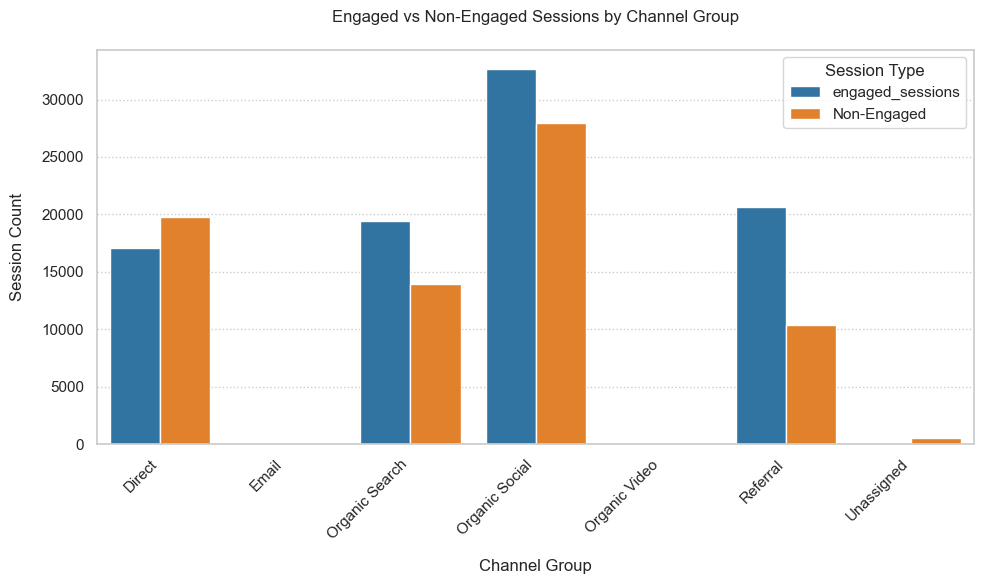

In [61]:

# print(df.columns.tolist())  # This will show all available columns


session_df = df.groupby("channel_group")[["sessions", "engaged_sessions"]].sum()
session_df["Non-Engaged"] = session_df["sessions"] - session_df["engaged_sessions"]

# Melt with correct column names
session_df_melted = session_df.reset_index().melt(
    id_vars="channel_group",  
    value_vars=["engaged_sessions", "Non-Engaged"],  #
    var_name="session_type",
    value_name="count"
)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=session_df_melted,
    x="channel_group",  # Must match exact column name
    y="count",
    hue="session_type",
    palette={"engaged_sessions": "#1f77b4", "Non-Engaged": "#ff7f0e"}  # Custom colors
)

plt.title("Engaged vs Non-Engaged Sessions by Channel Group", pad=20)
plt.xlabel("Channel Group", labelpad=12)
plt.ylabel("Session Count", labelpad=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Session Type")
plt.tight_layout()
plt.show()

# Traffic by hours and channel

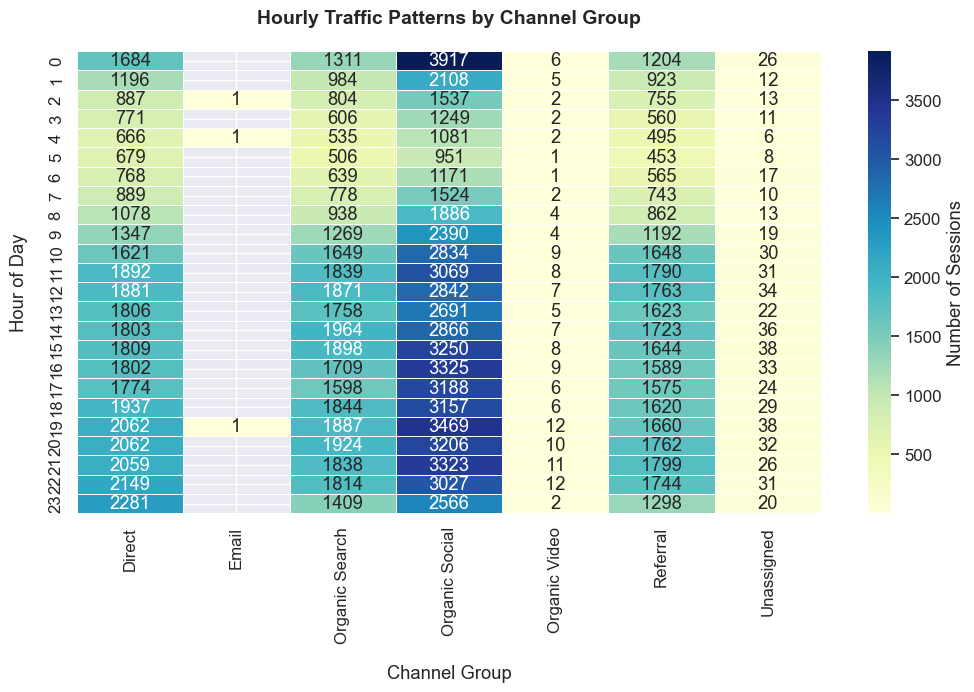

In [69]:
heatmap_data = df.groupby(["Hours","channel_group"])["sessions"].sum().unstack()

plt.figure(figsize=(12,6))
sns.set(font_scale=1.1)
sns.heatmap(heatmap_data, 
            cmap="YlGnBu",
            linewidths=.5,
            annot=True,
            fmt='.0f',
           linecolor='white',
           cbar_kws={'label': 'Number of Sessions'})
plt.title("Hourly Traffic Patterns by Channel Group", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("Channel Group", labelpad=15)
plt.ylabel("Hour of Day", labelpad=15)

plt.show()

# Engagement rate vs sessions over time

In [70]:
df.head()

,channel_group,date_hour,users,sessions,engaged_sessions,avg_engagement_time_per_session,engaged_sessions_per_user,events_per_session,engagement_rate,event_count,Hours
0,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
1,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
2,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
3,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
4,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21


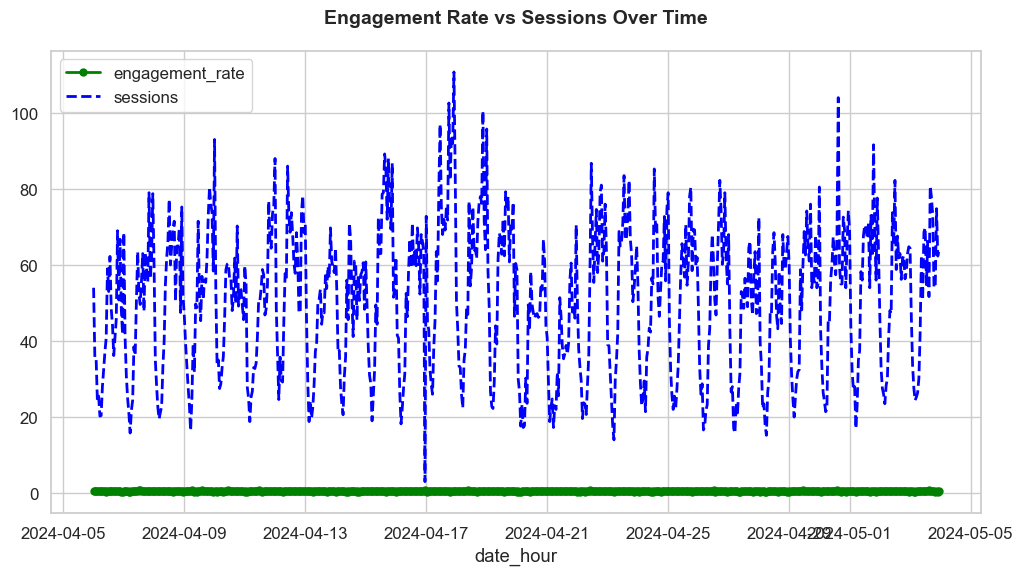

In [74]:
df_plot = df.groupby("date_hour")[["engagement_rate","sessions"]].mean().reset_index()
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.plot(df_plot["date_hour"],
         df_plot["engagement_rate"],
         label="engagement_rate",
         color="green",
         linewidth=2,
         marker='o',
         markersize=5
        )
plt.plot(
    df_plot["date_hour"], 
    df_plot["sessions"], 
    label="sessions", 
    color="blue",
    linewidth=2,
    linestyle='--'
)
plt.title("Engagement Rate vs Sessions Over Time", pad=20, fontsize=14, fontweight='bold')
plt.xlabel("date_hour")
plt.legend()
plt.show()

#  Correlation Analysis

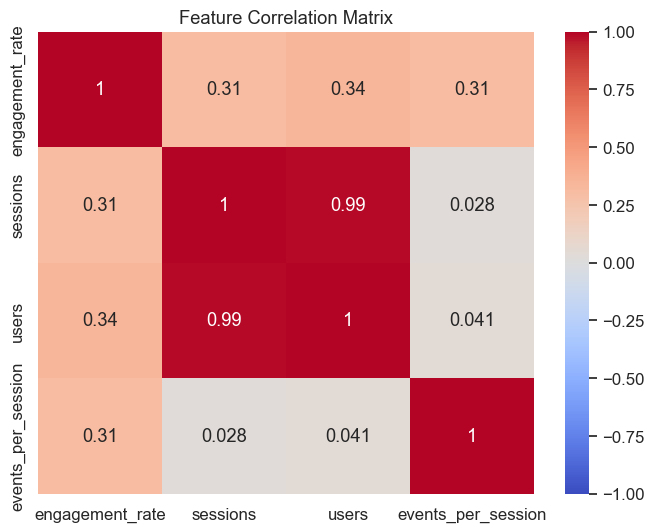

In [76]:
corr_matrix = df[["engagement_rate","sessions","users","events_per_session"]].corr()
plt.figure(figsize=(8,6))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


# Peak Hours Identification

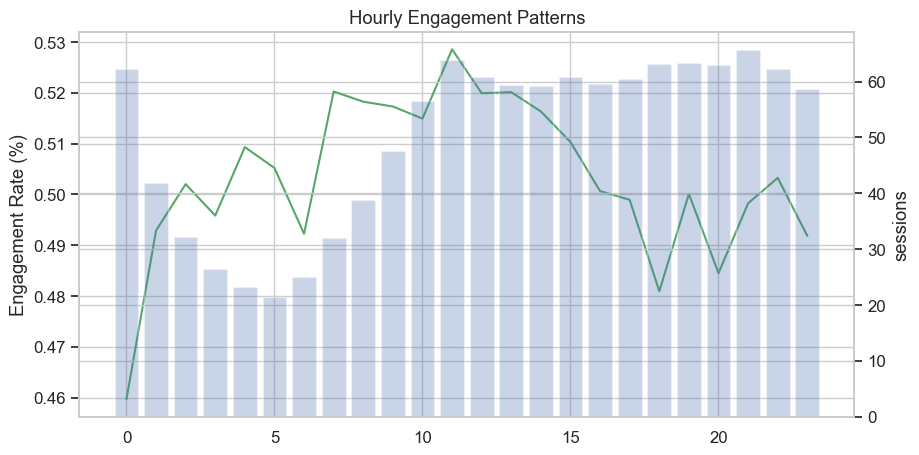

In [78]:
df['Hour'] = df['date_hour'].dt.hour
hourly_metrics = df.groupby('Hour')[["engagement_rate","sessions"]].mean()

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(hourly_metrics.index, hourly_metrics['engagement_rate'], 'g-')
ax1.set_ylabel('Engagement Rate (%)')
ax2 = ax1.twinx()
ax2.bar(hourly_metrics.index, hourly_metrics['sessions'], alpha=0.3)
ax2.set_ylabel('sessions')
plt.title("Hourly Engagement Patterns")
plt.show()
                                     

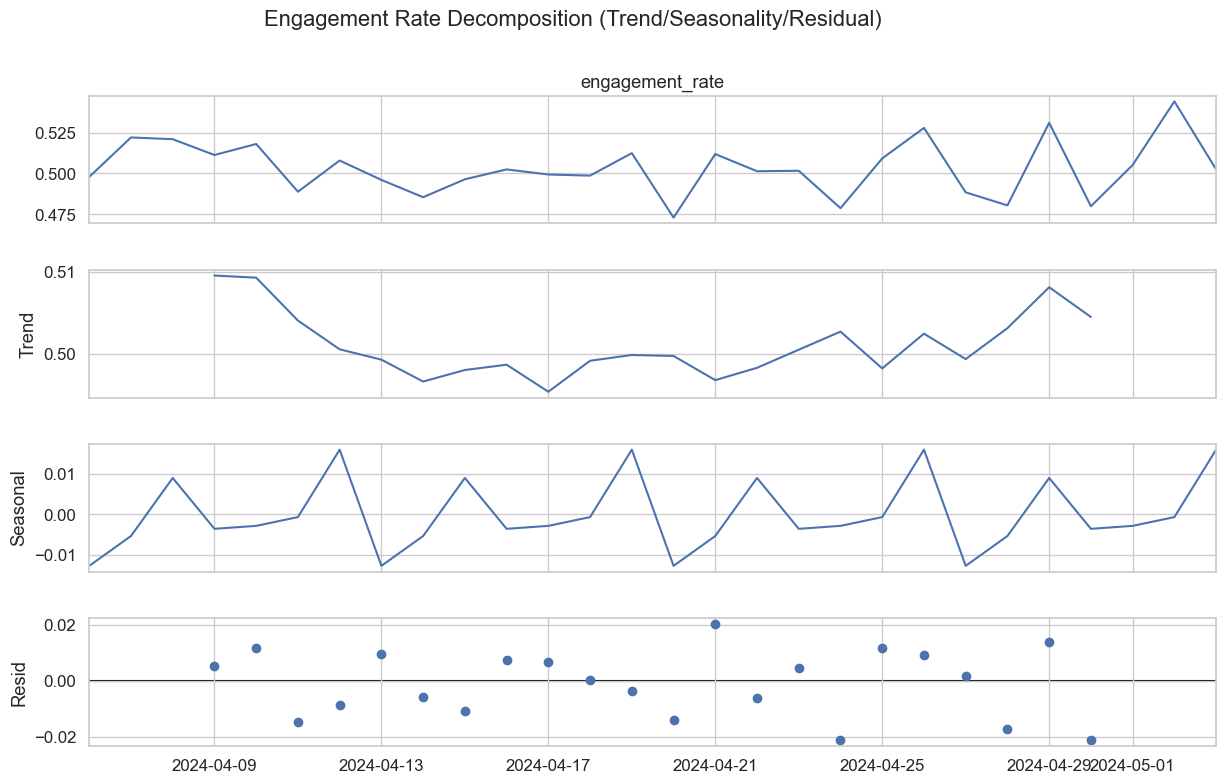

In [84]:
# Time Series Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

daily_eng = df.set_index('date_hour')['engagement_rate'].resample('D').mean()

# Decompose trends 

result = seasonal_decompose(daily_eng.dropna(), model='additive', period=7)
# result.plot()
result.plot().set_size_inches(14,8)
plt.suptitle("Engagement Rate Decomposition (Trend/Seasonality/Residual)" , y=1.02)
plt.show()

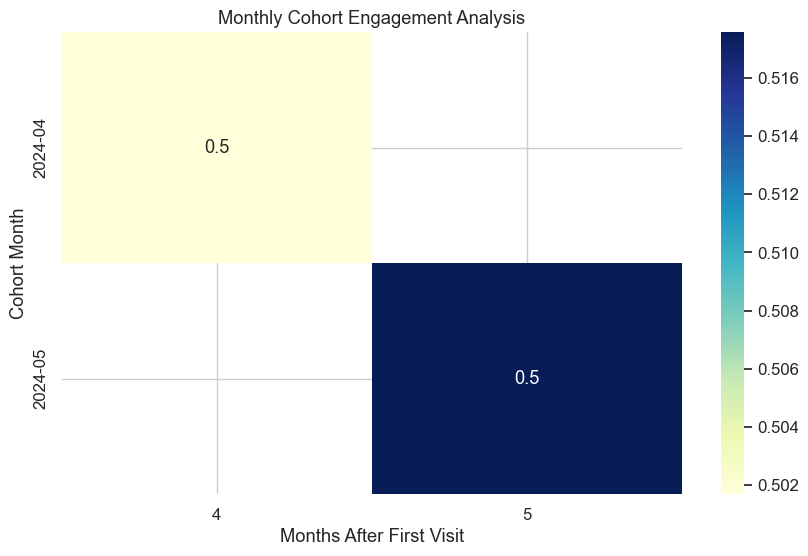

In [85]:
# Create monthly cohorts
df['CohortMonth'] = df['date_hour'].dt.to_period('M')
cohort_data = df.pivot_table(
    index='CohortMonth',
    columns=df['date_hour'].dt.month,
    values='engagement_rate',
    aggfunc='mean'
)

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(cohort_data, annot=True, fmt='.1f', cmap="YlGnBu")
plt.title("Monthly Cohort Engagement Analysis")
plt.ylabel("Cohort Month")
plt.xlabel("Months After First Visit")
plt.show()